In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

In [18]:
df = pd.read_parquet("Data/Cleaned/to_map.parquet")


In [33]:
df['GEOID'] = '36'+df['full_tract']
df.columns

Index(['NAME', 'percent_white', 'percent_black', 'percent_native',
       'percent_asian', 'percent_pacific', 'percent_latino',
       'percent_bachelors', 'percent_grad', 'percent_instate', 'med_income',
       'percent_owned', 'percent_rented', 'med_value', 'year', 'med_hh_age',
       'med_hh_residence', 'full_tract', 'Proportion_citibike_rides',
       'num_trees', 'med_rent', 'GEOID'],
      dtype='object')

In [28]:
def choropleth(df, feature, years, cmap, title=None):
    ''' Parameters
        ----------
        df : Pandas dataframe
        feature : str
            feature to be plotted
        year : list
            list of years (str) to be used for mapping
        cmap : str
            color map palette - look at seaborn documentation for options
        title : str, optional
            title for chart
        
        Yields
        -------
        matplotlib object
            Choropleth map(s) for specified feature and year(s)'''

    vmin = df[feature].min()
    vmax = df[feature].max()
    for year in years:
        # Create df specific to year parameter
        map_df = df[df.year == year]
        # Read shapefile using Geopandas
        gpd.read_file('Data/Raw/tracts2020_shapefile/nyct2020.shp')
        geo_df = shape_df.merge(map_df, on='GEOID')
        fig, ax = plt.subplots(figsize = (40,40))
        ax.patch.set_alpha(0.0)
        # Plot the geodataframe
        geo_df.plot(ax=ax, column =feature, cmap=cmap, legend=False, antialiased=False)
        # Set tile based on parameter, otherwise use feature name
        if title:
            ax.set_title(title+", "+year, fontdict={'fontsize': 60}, loc='center')
        else:
            ax.set_title(feature+", "+year, fontdict={'fontsize': 60}, loc='center')
        # ax.set(xlim=(-126, -66), ylim=(24, 50));
        # plt.xticks([], [])
        # plt.yticks([], [])
        cax = fig.add_axes([.95, 0.28, 0.02, 0.5])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        sm._A = []
        cbr = fig.colorbar(sm, cax=cax)
        cbr.set_label(feature, size=45)
        cbr.ax.tick_params(labelsize=35) 
        ax.set_axis_off()
          # ax.annotate("__Optional Annotation__", xy=(0.25, .1), size=20, xycoords='figure fraction')
    #     plt.savefig('../images/'+year+title+'.png',format = 'png',bbox_inches='tight', transparent=True)






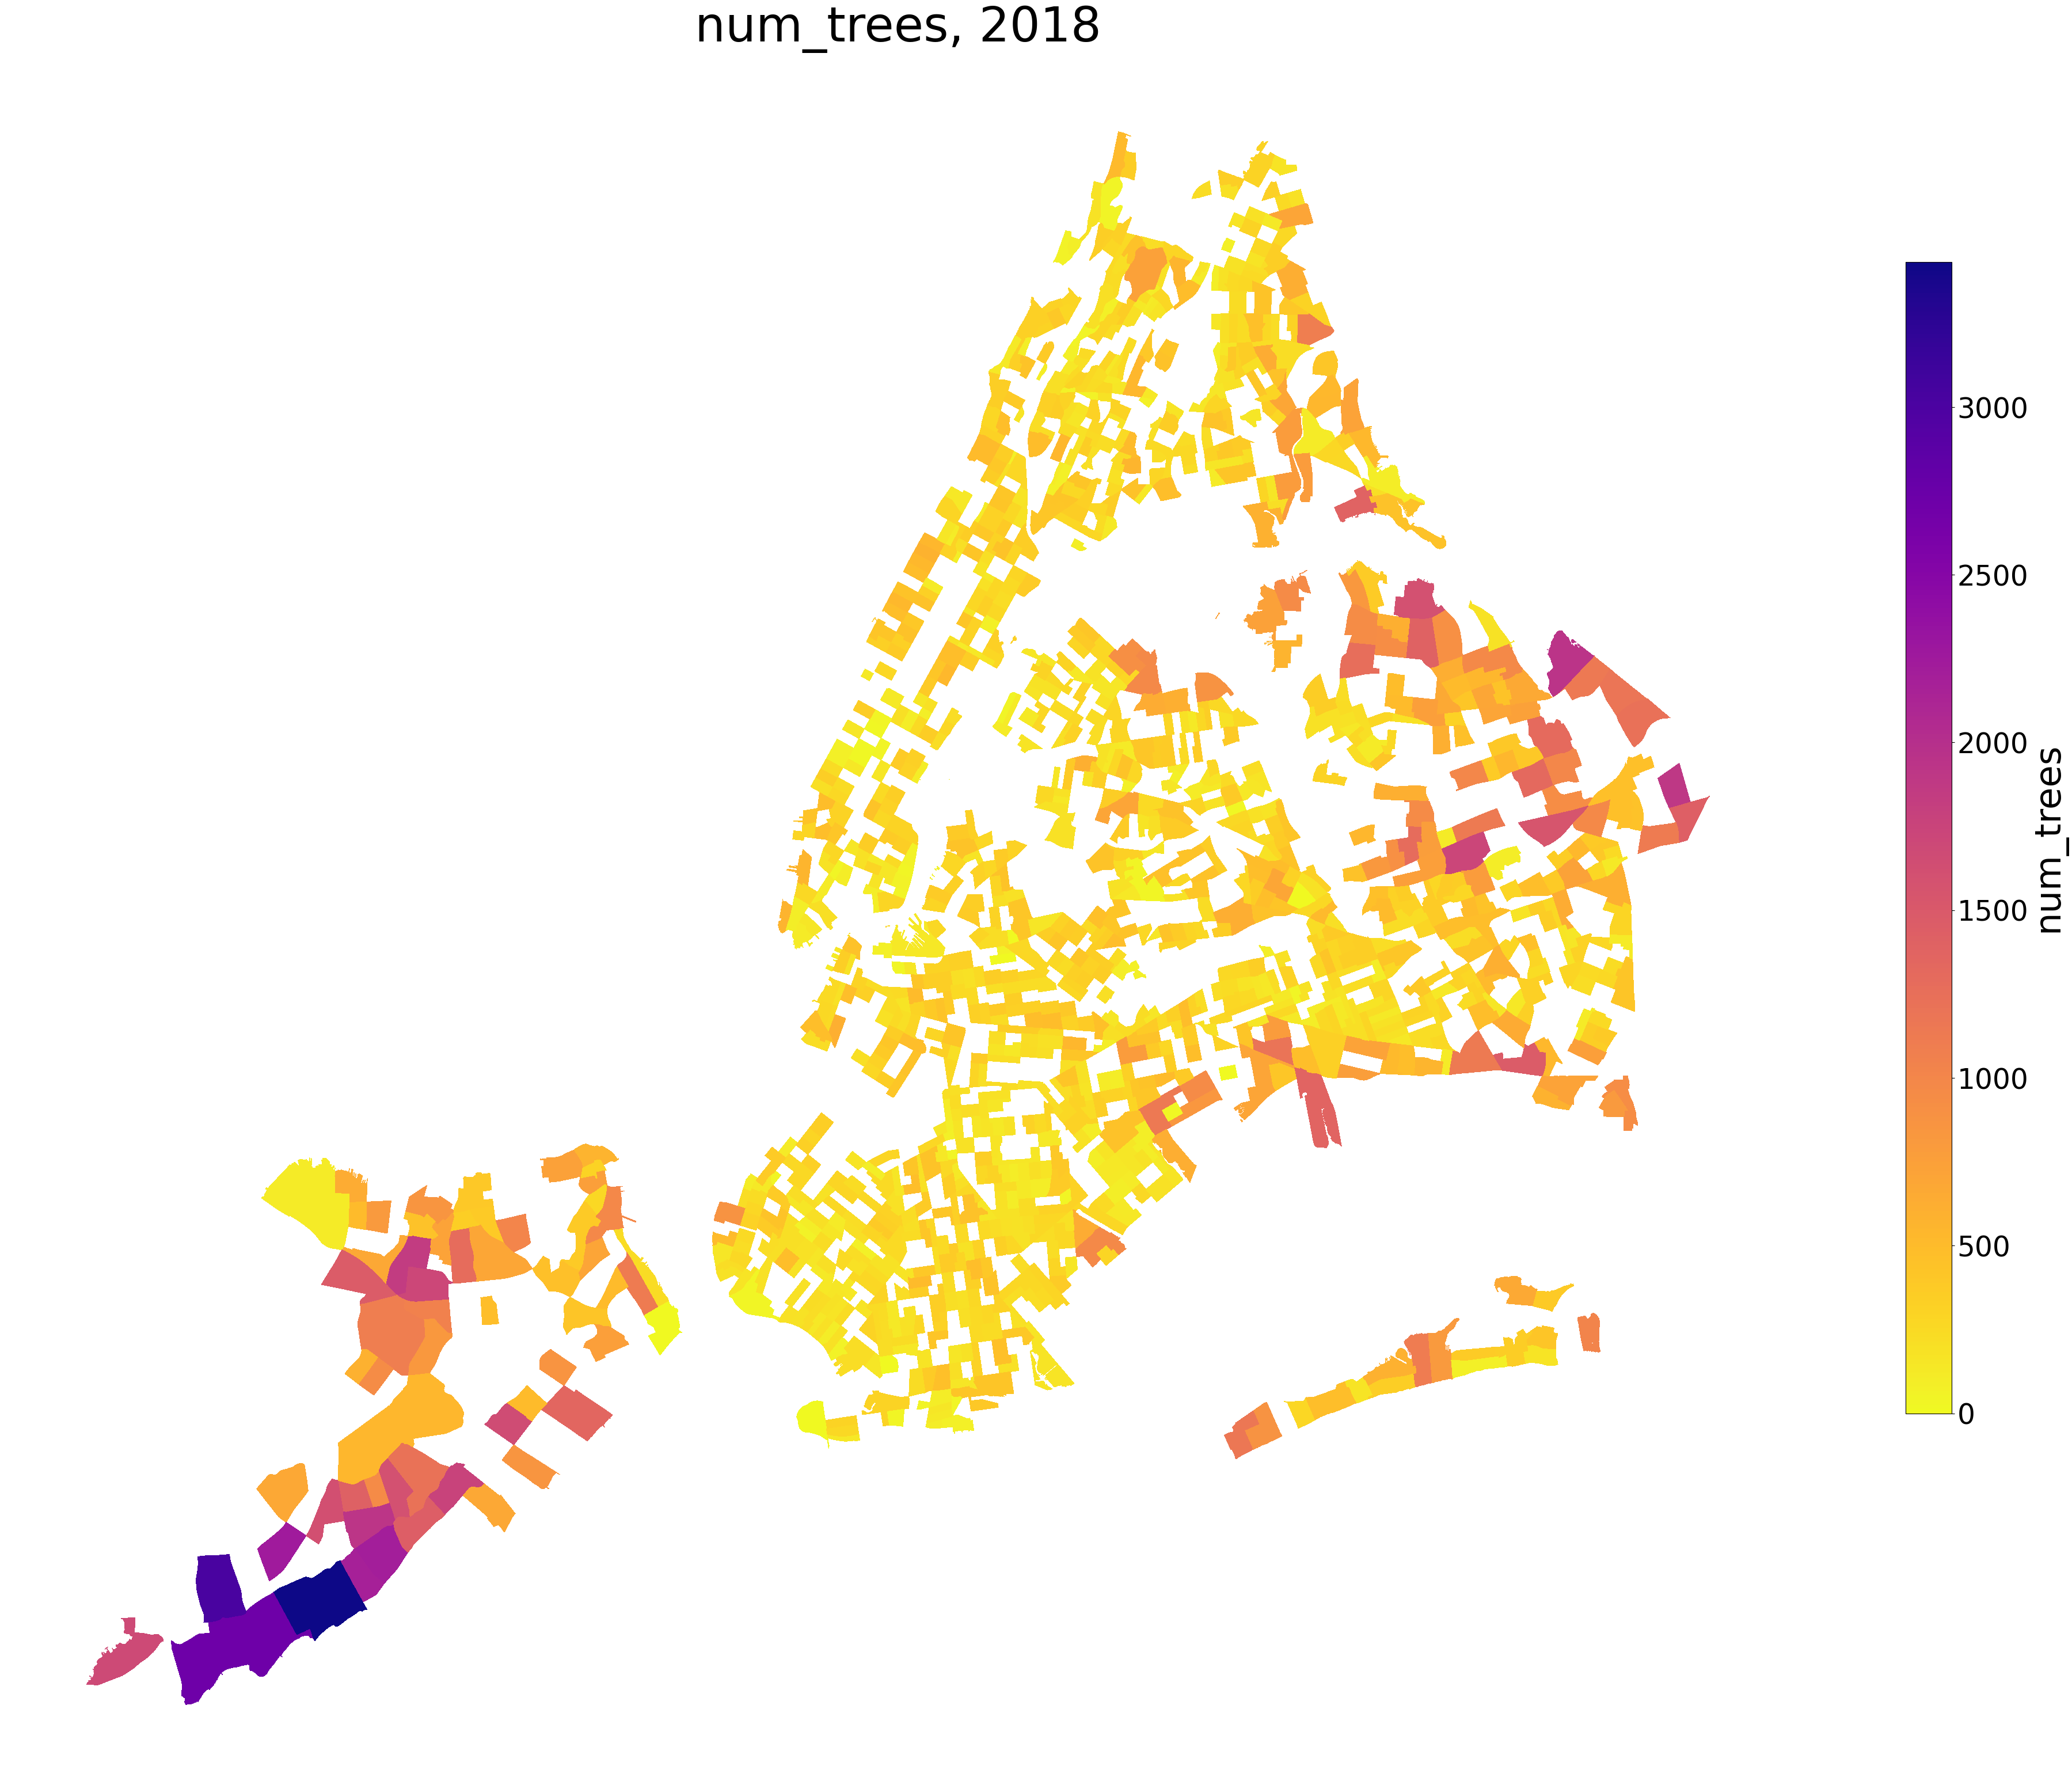

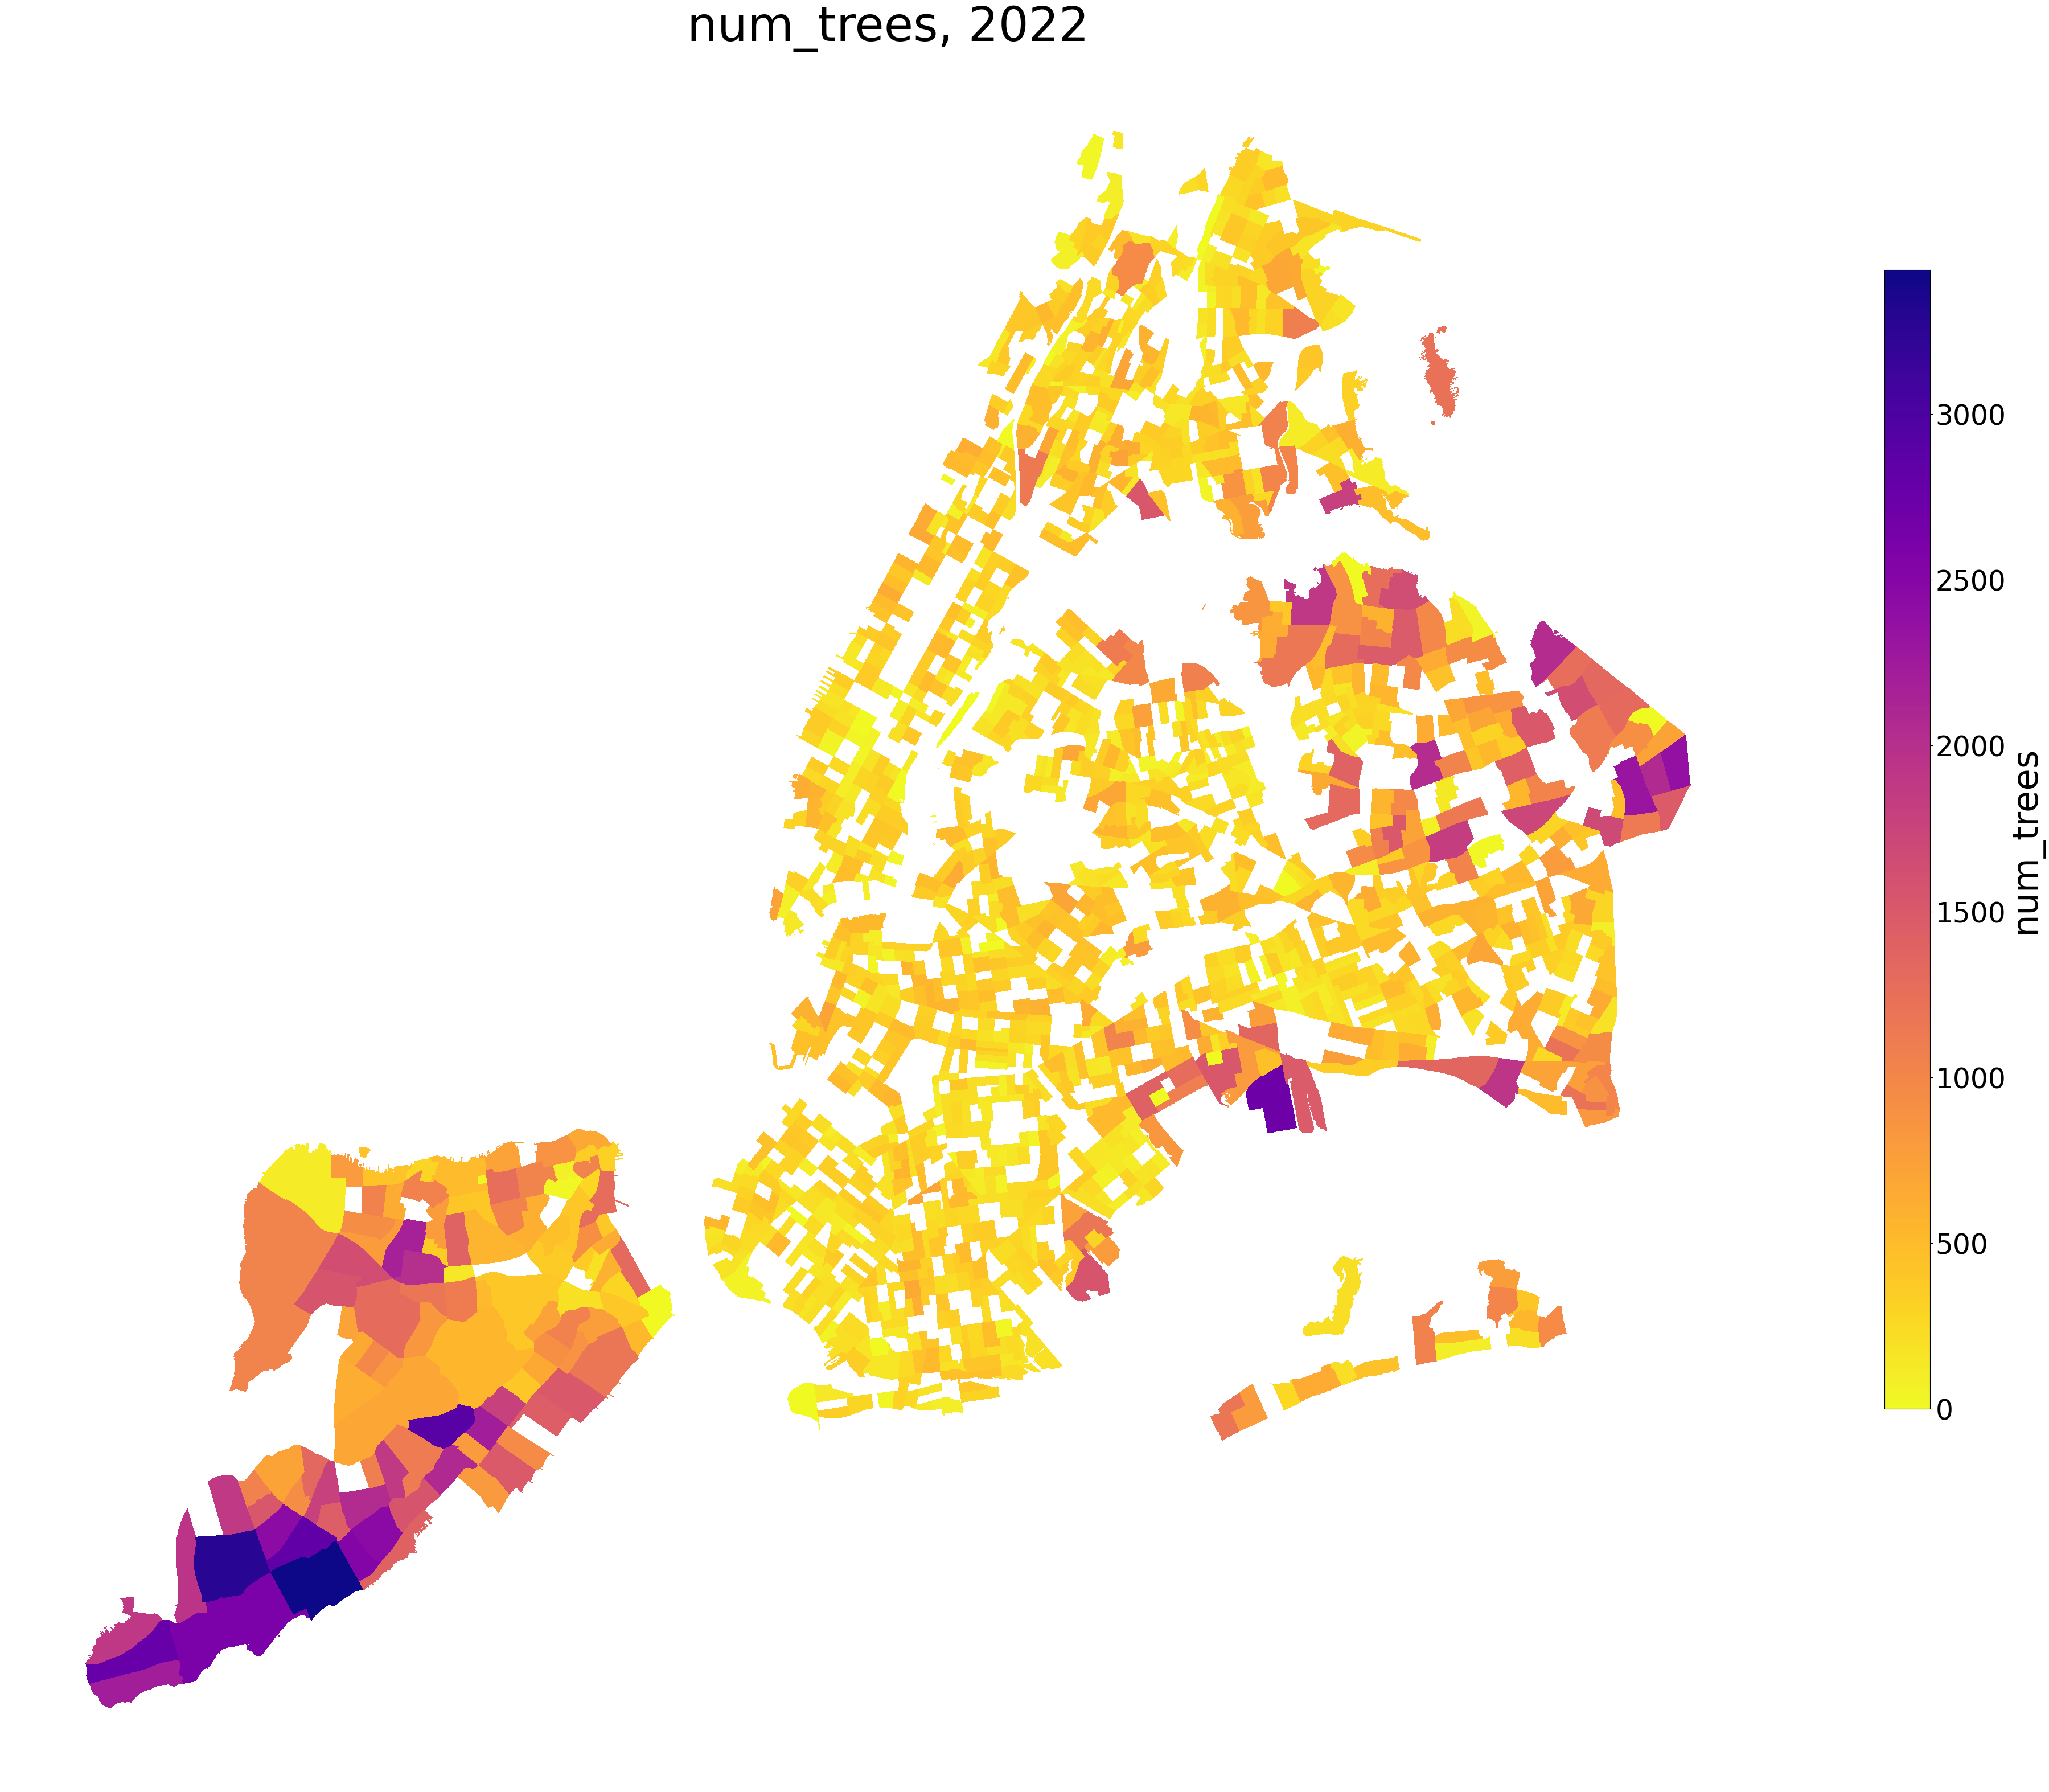

In [52]:
choropleth(df, 'num_trees', ['2018','2022'],'plasma_r')

In [ ]:
def lineplot(df, features, title=None):
    ''' Parameters
        ----------
        df : Pandas dataframe
        features: list
            one or more features to be plotted
        title: str, optional
            title for chart
        
        Yields
        -------
        matplotlib object
            One or more overlayed lineplots'''
    
    
    plt.figure(figsize=(20, 8));
    for feat in features:
        x = df.groupby("Year")[feat].mean().reset_index().dropna()
        y = (x[feat] - min(x[feat])) / (max(x[feat]) - min(x[feat]))
        ax= sns.lineplot(x=x['Year'].astype(int), y= y, label=feat, linewidth = 4)
    ax.set_title(title, fontsize=24);
    ax.set_ylabel('Scaled Value', fontsize=20);
    ax.set_xlabel('Year', fontsize=20);
    ax.legend(prop=dict(size=18));
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
#     plt.savefig('../images/line_'+title+'.png',format = 'png',bbox_inches='tight', transparent=True)



def barchart(df, features, title=None):
    ''' Parameters
        ----------
        df : Pandas dataframe
        features: list
            one or more features to be plotted
        title: str, optional
            title for chart
        
        Yields
        -------
        matplotlib object
            One or more side-by-side barcharts'''
    
    # Create df for year
    plot_df = df.groupby("Year")[features].mean().fillna(0)
    # Plot each feature specified in parameters
    for feat in features:
        plot_df[feat] =(plot_df[feat] - min(plot_df[feat])) / (max(plot_df[feat]) - min(plot_df[feat]))
    plot_df.plot(by='Year',kind='bar',fontsize=16,rot='horizontal',figsize=(25,10));
    plt.xlabel('Year', fontdict={'fontsize':24});
    plt.ylabel('Scaled Count', fontdict={'fontsize':24});
    plt.xticks(fontsize=22);
    plt.yticks(fontsize=22);
    plt.legend(prop=dict(size=22));
    plt.title(title, fontdict={'fontsize':30});
#     plt.savefig('../images/bar_'+title+'.png',format = 'png',bbox_inches='tight', transparent=True)